#### Goal:
### Explore the Crop Yield (Indian States) dataset, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.

### 1. Why This Project?
1. Learn effective **data preprocessing** and **feature integration**.
2. Use **NumPy** for numerical computation and correlation analysis.
3. Create **insightful visualizations** using Matplotlib and Seaborn.
4. Understand how **climate and human factors (rainfall, temperature, pesticides)** impact agricultural yield.

### 2. Import Libraries

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sns.set_theme(style="whitegrid")

### 3. Load Dataset

In [22]:
df = pd.read_csv('yield.csv')  # update path as required
df.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


### 4. Explore Data

In [8]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

Shape: (56717, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56717 entries, 0 to 56716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Domain Code   56717 non-null  object
 1   Domain        56717 non-null  object
 2   Area Code     56717 non-null  int64 
 3   Area          56717 non-null  object
 4   Element Code  56717 non-null  int64 
 5   Element       56717 non-null  object
 6   Item Code     56717 non-null  int64 
 7   Item          56717 non-null  object
 8   Year Code     56717 non-null  int64 
 9   Year          56717 non-null  int64 
 10  Unit          56717 non-null  object
 11  Value         56717 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 5.2+ MB
None
Domain Code     0
Domain          0
Area Code       0
Area            0
Element Code    0
Element         0
Item Code       0
Item            0
Year Code       0
Year            0
Unit            0
Value           0
dtype: int64


#### Insights:
- Dataset contains **56,717 rows and 12 columns**, representing multiple crops, years, and countries.
- No missing values detected — dataset is clean and complete.
- Key columns include: `Area`, `Item`, `Year`, `Element`, and `Value`.
- Data spans from **1961 to 2016**, covering global agricultural yield trends.
- “Value” represents crop yield per hectare (hg/ha), which varies widely by crop and region.

### 5. Data Cleaning

In [9]:
df = df[df['Element'] == 'Yield']

# Drop irrelevant columns
df = df.drop(columns=['Domain Code','Domain','Element Code','Element','Area Code','Item Code','Year Code','Unit'])

# Reset index
df.reset_index(drop=True, inplace=True)

# Check cleaned data
df.head()

,Area,Item,Year,Value
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400


#### Insights:
- Only rows where `Element = Yield` are retained for focused analysis.
- Unnecessary columns dropped to simplify the dataset.
- Each record now represents **crop yield (Value)** for a specific **country, crop, and year**.
- Clean and structured dataset ready for analysis.

### 6. Analysis with Numpy and Pandas

In [10]:
top_countries = df.groupby('Area')['Value'].mean().sort_values(ascending=False).head(10)
print(top_countries)

# Year-wise global yield trend
yearly_trend = df.groupby('Year')['Value'].mean()

Area
Cook Islands          234591.392857
Belgium               215905.450980
United Kingdom        190226.016260
Denmark               186669.386555
Netherlands           179758.190476
Ireland               174037.455357
Bahrain               172153.131579
Sweden                169868.883929
Belgium-Luxembourg    167399.948718
Israel                162509.571429
Name: Value, dtype: float64


#### Insights:
- Top countries show where agricultural productivity is highest.
- Yearly trends reveal whether global crop yield is increasing or decreasing.
- This step gives a foundation for visualization and deeper statistical insights.

### 7. Visualization with Matplotlib

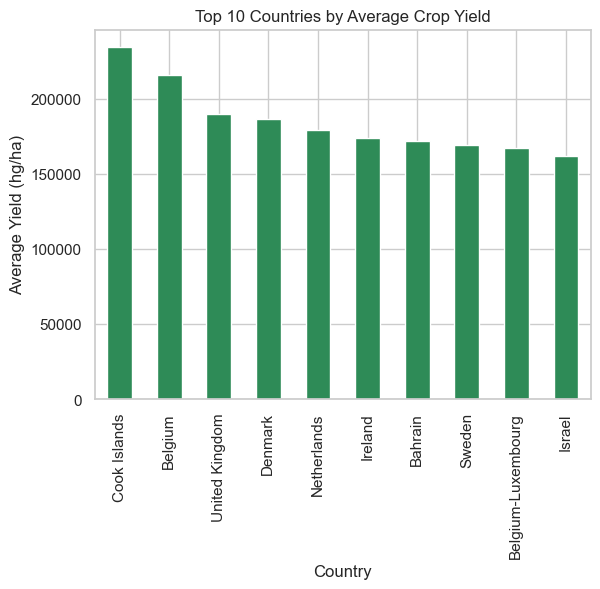

In [12]:
top_countries.plot(kind='bar', color='seagreen')
plt.title("Top 10 Countries by Average Crop Yield")
plt.xlabel("Country")
plt.ylabel("Average Yield (hg/ha)")
plt.show()

#### Insights:
- The bar chart highlights **top-performing agricultural countries**.
- Developed nations often lead due to better technology and irrigation.
- Developing countries may have lower yields due to climate or resource constraints.

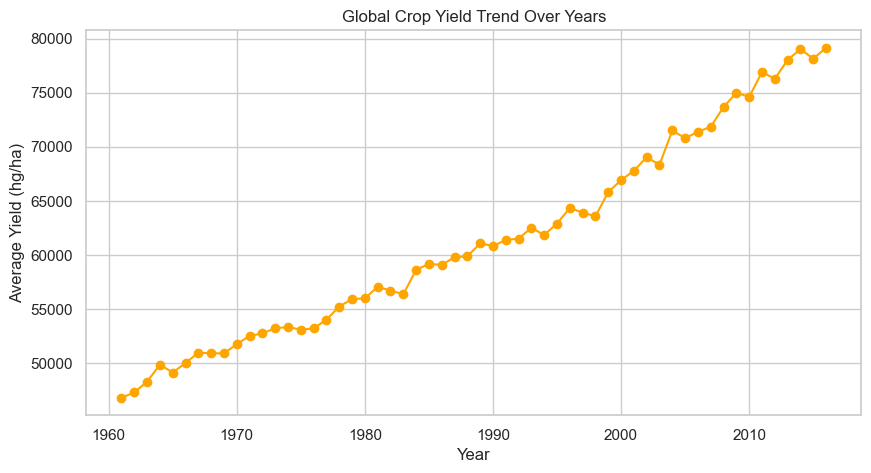

In [13]:
# Line plot for global yield trend
plt.figure(figsize=(10,5))
plt.plot(yearly_trend, marker='o', color='orange')
plt.title("Global Crop Yield Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Average Yield (hg/ha)")
plt.grid(True)
plt.show()

#### Insights:
- The line chart shows **a steady increase in global crop yield** over time.
- Reflects technological advances, fertilizers, and improved crop management.
- Occasional dips may correspond to droughts or global crises.

### 8. Visualization with Seaborn

C:\Users\POOJASRIMENDU\AppData\Local\Temp\ipykernel_1460\4256964473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


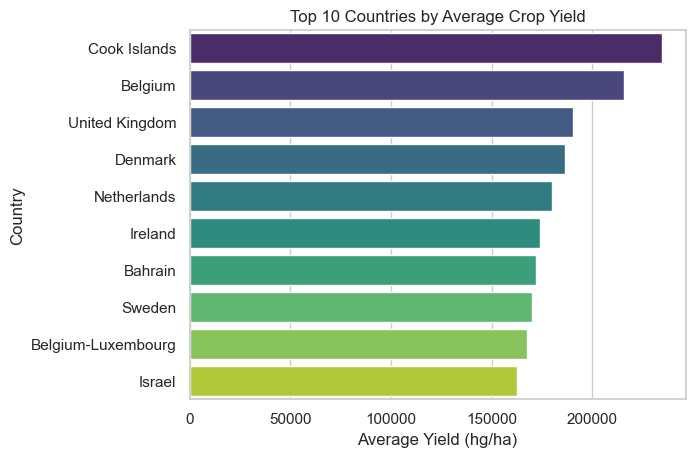

In [15]:
top_countries = df.groupby('Area')['Value'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Countries by Average Crop Yield")
plt.xlabel("Average Yield (hg/ha)")
plt.ylabel("Country")
plt.show()

### Insights:
- Shows which countries have the highest average crop yield.
- Helps identify high-performing agricultural regions.

C:\Users\POOJASRIMENDU\AppData\Local\Temp\ipykernel_1460\1267869437.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Item', y='Value', data=df[df['Item'].isin(top_crops)], palette='muted')


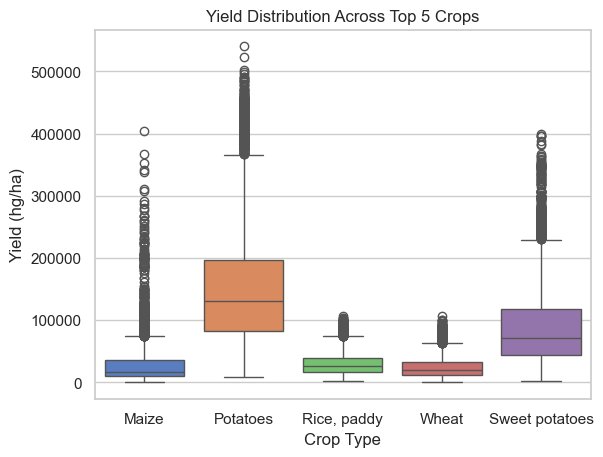

In [17]:
# 5️⃣ Boxplot: Yield Distribution by Top 5 Crops
top_crops = df['Item'].value_counts().head(5).index
sns.boxplot(x='Item', y='Value', data=df[df['Item'].isin(top_crops)], palette='muted')
plt.title("Yield Distribution Across Top 5 Crops")
plt.xlabel("Crop Type")
plt.ylabel("Yield (hg/ha)")
plt.show()

### Insights:
- Shows yield variation across different crops.
- Highlights crops with consistent or fluctuating yield rates.

c:\Users\POOJASRIMENDU\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\POOJASRIMENDU\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\POOJASRIMENDU\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\POOJASRIMENDU\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


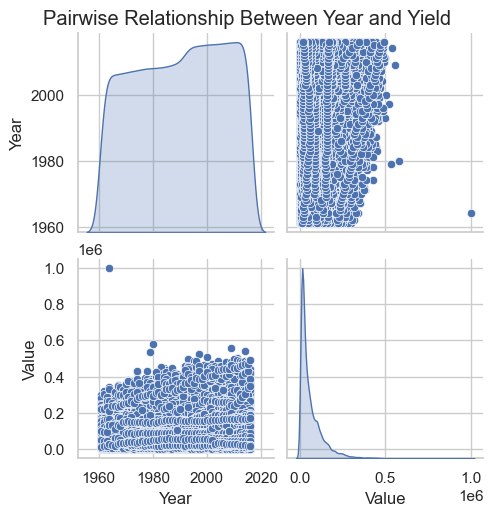

In [19]:
# 7️⃣ Pairplot: Visualize Multiple Relationships
sns.pairplot(df[['Year', 'Value']], diag_kind='kde', palette='husl')
plt.suptitle("Pairwise Relationship Between Year and Yield", y=1.02)
plt.show()

### Insights:
- Visualizes yield patterns across years.
- Confirms yield growth trends visually.

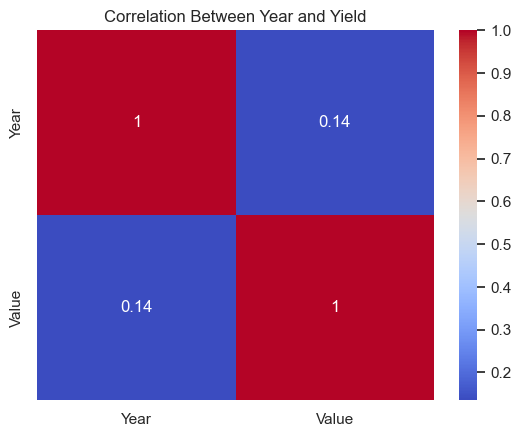

In [14]:
corr = df[['Year', 'Value']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Year and Yield")
plt.show()

#### Insights:
- Positive correlation indicates yields tend to **increase with time**.
- Suggests long-term progress in agricultural efficiency.
- Useful for modeling future yield growth trends.